# Домашнее задание

В этом домашнем задании вам предстоит обучить модель классификации рукописных цифр на Tensorflow.

Важным дополненительным требованием будет сохранение чекпоинтов на ваш гугл диск (не переживайте ниже будут подсказки как это сделать). Это пригодится вам в дальнейшем при обучении более сложных моделей, на случай потери данных при неожиданном отключении Colab.

In [ ]:
import tensorflow as tf
print(tf.__version__)
from google.colab import drive
c
import matplotlib.pyplot as plt
import numpy as np

2.4.1


####Вспомогательный код

In [ ]:
#@title 
def show_mnist(images, labels, predicted_labels=None):
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.gray)
        if predicted_labels is not None:
            title_obj = plt.title(f"Real: {labels[i]}. Pred: {predicted_labels[i]}")
            if labels[i] != predicted_labels[i]:
                plt.setp(title_obj, color='r')
        else:
            plt.title(f"Real label: {labels[i]}")

def show_progress(history: dict):
    plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1,2,1)    
    plt.plot(history["accuracy"],label='train accuracy')
    plt.plot(history["val_accuracy"], label='test accuracy')
    ax2 = plt.subplot(1,2,2)
    plt.plot(history["loss"],label='train_loss')
    plt.plot(history["val_loss"],label='test_loss')
    
    ax1.legend(loc='best')
    ax2.legend(loc='best')
    plt.grid()
    plt.tight_layout()
    plt.show()

## Загрузка данных

11493376/11490434 [==============================] - 0s 0us/step


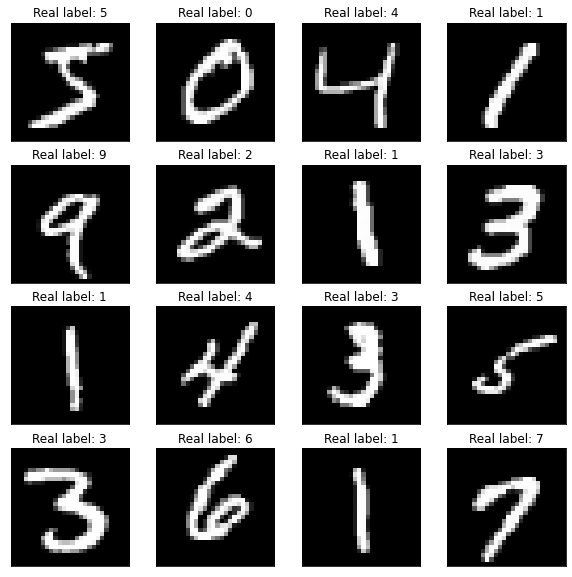

In [ ]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

show_mnist(x_train, y_train)
x_train = x_train.reshape((-1, 28*28)) # вытянули каждую картинку в вектор
x_test = x_test.reshape((-1, 28*28))


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# прикрепим ваш гугл диск к виртуальной машине
drive.mount('/content/drive/')

KeyboardInterrupt: ignored

In [ ]:
# Путь до вашего гугл диска скорее всего выглядит так: /content/drive/My Drive/
# если эта клетка вызывает ошибку, 
# измените путь согласно ! ls "/content/drive/"

path = Path("/content/drive/MyDrive/Skillbox/model_1")
path.mkdir(exist_ok=True, parents=True) # папка создается на вашем гугл диске. вместе с "родителями"
assert path.exists()
cpt_filename = "best_checkpoint.hdf5"  
cpt_path =str(path / cpt_filename)
# После выполнения этой клетки, в вашем гугл диске должна создаться папка: Skillbox/model_1
# убедитесь в этом

А весь код ниже вы реализуете самостоятельно! Вы уже к этому готовы :)
Требования к модели:
1. Точность на тестовой части выборки >96%
2. Чекпоинт модели с лучшими параметрами должен быть сохранен у вас на гугл диске
3. Объект history, который получается из model.fit(...) должен содержать значения лосса и accuracy для трейна и теста

In [ ]:
# < YOUR CODE STARTS HERE >

checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_loss', verbose=0, save_best_only=True, mode='min')

# from keras.utils import np_utils   
# nb_classes = 10
# Y_train = np_utils.to_categorical(y_train, nb_classes)
# Y_test = np_utils.to_categorical(y_test, nb_classes)
# pd.get_dummies
import pandas as pd
Y_train = pd.get_dummies(y_train)
Y_test = pd.get_dummies(y_test)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, input_shape=(784,), activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))



# <YOUR CODE ENDS HERE>

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(512, input_shape=(784,), activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(1))

# <YOUR CODE ENDS HERE >

model.summary()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, Y_train, validation_data=(x_test, Y_test), epochs=50, batch_size=256, verbose=1, callbacks=[checkpoint])
# < YOUR CODE ENDS HERE >

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
235/235 [==============================] - 4s 4ms/step - loss: 0.5051 - accuracy: 0.8587 - val_loss: 0.1136 - val_accuracy: 0.9645
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0995 - accuracy: 0.9718 - val_loss: 0.0875 - val_accuracy: 0.9717
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0656 - accuracy: 0.9

In [ ]:
assert len(list(path.glob("*"))) != 0, f"Checkpoint dir {path}"
assert "accuracy" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
assert "val_accuracy" in history.history, "Please, provide validation_data in model.fit."
assert np.max(history.history["val_accuracy"]) > 0.95, "Validation accuracy must be more than 0.95"
# Для старой версии (tf.__version__ == 1.x) запустить aseert-ы ниже:
# assert "acc" in history.history, "History object must contain Accuracy. Please, retrain with this metric"
# assert "val_acc" in history.history, "Please, provide validation_data in model.fit."
# assert np.max(history.history["val_acc"]) > 0.95, "Validation accuracy must be more than 0.95"
print("Training tests passed")

Training tests passed


Давайте посмотрим на графики обучения:

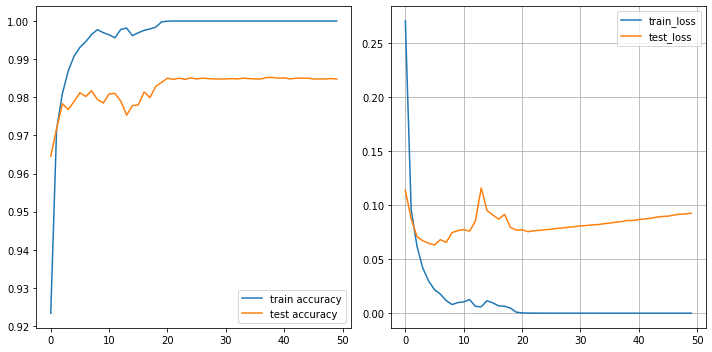

In [ ]:
show_progress(history.history)

А теперь перейдем к загрузке модели. Если все реализовано правильно, то код ниже должен сработать без ошибок:

In [ ]:
restored_model = tf.keras.models.load_model(cpt_path)
loss, acc = restored_model.evaluate(x_test, Y_test)
print(f"Accuracy of restored model {acc*100 :.2f}%")
assert acc > 0.96

И, наконец, можно сравнить предсказания с реальными классами (с такой точностью найти ошибку будет сложно):

In [ ]:
predicted_labels = restored_model.predict_classes(x_test)
idxs = np.random.choice(np.arange(len(x_test)), 16, replace=False)
show_mnist(x_test[idxs].reshape((-1, 28, 28)), y_test[idxs], predicted_labels[idxs])

In [ ]:
history.history

{'accuracy': [0.9233666658401489,
  0.9715333580970764,
  0.9810166954994202,
  0.9869166612625122,
  0.9907833337783813,
  0.9930833578109741,
  0.9945833086967468,
  0.9964666962623596,
  0.9977333545684814,
  0.9969499707221985,
  0.9963833093643188,
  0.9955833554267883,
  0.997783362865448,
  0.9981333613395691,
  0.996150016784668,
  0.996916651725769,
  0.9975500106811523,
  0.9979166388511658,
  0.9983999729156494,
  0.9997833371162415,
  0.9999499917030334,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.27044108510017395,
  0.09576471894979477,
  0.061840273439884186,
  0.041614942252635956,
  0.029739825055003166,
  0.021733742207288742,
  0.0176448542624712,
  0.011693984270095825,
  0.008000199683010578,
  0.00980931892991066,
  0.010427345521748066,
  0.012641951441764832,
  0.006327222567051649,
  0.005888